# Creación de un DataFrame Propio

### **Nicole Góngora Rodríguez**

El siguiente notebook es una demostración del uso de las funciones de generación/selección de datos por NumPy para la creación de un DataFrame propio, así como un análisis exploratorio mediante gráficos estadísticos (Histogramas, tortas, diagramas de cajas y bigotes), así como la conjunción de tablas para generar un análisis estadístico más organizado.
Este trabajo fue realizado de manera personal y supervisada con el docente de la materia Erwin Veneros para la demostración de aplicación de conceptos para el primer parcial de la materia

In [228]:
import pandas as pd # Trabajos con datasets
import numpy as np # Funciones matemáticas
import matplotlib.pyplot as plt #Gráficos sencillos

#### Concepto del dataframe

Este dataframe es una simulación de una base de datos de estudiantes a graduarse de la Universidad Privada Boliviana, exactamente, aquellos pertenecientes a la Facultad de Ingenierias y Arquitectura (FIA), de acuerdo a datos cercanos a la realidad. No se tomaron datos demasiado sensibles como el nombre, ya que esta generación de DataFrames sería más compleja por estas combinaciones. La manera en la que se puede identificar al estudiante, de acuerdo a este punto, es mediante su código en el sistema.

La primera fase de esta base de datos consiste en una tabla generada con algoritmos aleatorios, de 1000 entradas/filas, y que contiene los siguientes campos:
- Edad: Números enteros, entre un rango de 18 a 24 años
- Carrera: String, una selección randómica entre carreras ubicadas en la Facultad
- Nota: Números decimales, obtenidos mediante la función de datos numerales dentro de una distribución normal Gaussiana, y luego un redondeo a dos cifras. La media a tomar será de 95, con una desviación estandar de 5.5 y un tamaño de 1000 filas, esto con el fin de que se obtengan notas a partir de una distribución lo más cercana posible al rendimiento real de los estudiantes graduados en la Universidad. Si el número ha de pasar por encima de los 100.00 puntos, se regula este valor al establecerlo al límite máximo: 100
- Código: Números enteros, entre un rango de 50000 a 51000 de acuerdo al sistema de numeración del código de estudiantes en la Universidad
- Género: String, una selección randómica entre tres selecciones "Masculino", "Femenino", "Otro"
- Semestre: String, una denominación de tipo "I", "II"
- Materias tomadas en semestre: Números enteros, entre un rango de 4 y 8 (las materias que ha tomado en el semestre que le corresponde)

In [229]:
# Función de creación de DataFrames con semestre customizable "I"/"II"
def databaseCreator(semestre):
    Edad=[]
    Carrera=[]
    Nota=[]
    Graduacion=[]
    Codigo=[]
    Genero=[]
    MateriasPorSemestre=[]
    Semestre=[]

    carrerasFIA=["Ingeniería del Medio Ambiente y Energías Alternativas", "Arquitectura",
             "Ingeniería de la Producción","Ingeniería de Sistemas Computacionales","Ingeniería de Petroleo y Gas Natural",
             "Ingeniería Electromecánica","Ingeniería Civil","Ingeniería de Sistemas Electrónicos y Telecomunicación",
             "Ingeniería Industrial y de Sistemas", "Departamento de Ciencias Exactas"]
    carrerasFIA.sort()

    Edad=np.random.randint(low=18,high=24,size=1000)
    Carrera=np.random.choice(carrerasFIA,size=1000)
    Nota=np.round(np.random.normal(loc=95,scale=5.5,size=1000),2)
    Codigo=list(range(50000,51000))
    Codigo2=np.random.randint(low=50000,high=51000,size=1000)
    Genero=np.random.choice(['Masculino','Femenino','Otro'],size=1000)
    MateriasPorSemestre=np.random.randint(low=4,high=8,size=1000)

    for i in range(1000):
        Semestre.append(semestre)
        if Nota[i]<90.00:
            Graduacion.append("Por Trabajo final")
        else:
            if Nota[i]>100.00:
                Nota[i]=100.00
            Graduacion.append("Por Excelencia")
    datos = {'Codigo':Codigo, 'Genero': Genero,'Edad': Edad, 'Carrera': Carrera,'Nota':Nota,'Modalidad de Graduacion':Graduacion, 'Semestre':Semestre,'Materias tomadas en semestre':MateriasPorSemestre}
    dataframenuevo = pd.DataFrame(data=datos)

    return dataframenuevo

In [230]:
# Función de creación de diagramas de cajas y bigotes
def boxplotCreate(dataf,carrera):
    titulo="Diagrama de cajas y bigotes de promedios "+carrera
    plt.boxplot(list(dataf['Nota'][dataf['Carrera']==carrera]))
    plt.title(titulo)
    plt.grid()
    plt.xlabel("Caja de estudiantes")
    plt.ylabel("Notas de promedio")
    plt.show()

In [231]:
# Función de creación de gráficos de tortas
def pieCreator(dataf,columnaclas,columnacount,modo,title):
    """
    dataf - DataFrame
    columnaclas - columna de clasificacion del dataFrame
    columnacount - columna de conteo del dataFrame
    modo - modo de ordenamiento de columna de conteo (True=Asc, False=Desc)
    title - Título
    """
    CategoriesPie=dataf[columnaclas].unique()
    CantidadCat=[dataf[columnacount][dataf[columnaclas]==x].sum() for x in CategoriesPie]
    DFPie=pd.DataFrame({
    columnaclas:CategoriesPie,
    columnacount:CantidadCat})
    DFPie=DFPie.sort_values(columnacount,ascending=modo)
    DFPie=DFPie[:5]
    plt.pie(DFPie[columnacount],labels=DFPie[columnaclas],autopct='%1.1f%%',explode=[0,0,0,0,0],startangle=90)
    plt.title(title)
    plt.show()
    return DFPie

#### Creación de dataframes con el programa
Dos dataframes son creados, uno por semestre, para luego ser juntados y reorganizados con respecto al código del estudiante

In [232]:
# Un dataframe creado para el primer semestre
DB1=databaseCreator('I')
DB1

,Codigo,Genero,Edad,Carrera,Nota,Modalidad de Graduacion,Semestre,Materias tomadas en semestre
0,50000,Otro,19,Departamento de Ciencias Exactas,100.00,Por Excelencia,I,5
1,50001,Masculino,19,Ingeniería Civil,96.52,Por Excelencia,I,5
2,50002,Femenino,19,Ingeniería Civil,96.90,Por Excelencia,I,4
3,50003,Otro,18,Arquitectura,93.00,Por Excelencia,I,7
4,50004,Masculino,20,Arquitectura,94.21,Por Excelencia,I,7
...,...,...,...,...,...,...,...,...
995,50995,Femenino,22,Ingeniería de Petroleo y Gas Natural,88.28,Por Trabajo final,I,6
996,50996,Femenino,23,Ingeniería de Petroleo y Gas Natural,98.75,Por Excelencia,I,5
997,50997,Femenino,20,Ingeniería de la Producción,96.47,Por Excelencia,I,6
998,50998,Femenino,23,Ingeniería Civil,97.58,Por Excelencia,I,6


In [233]:
# Un dataframe creado para el segundo semestre
DB2=databaseCreator('II')
DB2

,Codigo,Genero,Edad,Carrera,Nota,Modalidad de Graduacion,Semestre,Materias tomadas en semestre
0,50000,Masculino,19,Departamento de Ciencias Exactas,93.77,Por Excelencia,II,7
1,50001,Otro,21,Arquitectura,89.48,Por Trabajo final,II,7
2,50002,Masculino,19,Arquitectura,82.94,Por Trabajo final,II,6
3,50003,Femenino,19,Ingeniería de la Producción,95.33,Por Excelencia,II,5
4,50004,Femenino,22,Ingeniería Industrial y de Sistemas,100.00,Por Excelencia,II,7
...,...,...,...,...,...,...,...,...
995,50995,Femenino,21,Ingeniería del Medio Ambiente y Energías Alter...,95.99,Por Excelencia,II,4
996,50996,Masculino,19,Ingeniería de Petroleo y Gas Natural,99.14,Por Excelencia,II,6
997,50997,Masculino,23,Ingeniería Electromecánica,96.14,Por Excelencia,II,5
998,50998,Femenino,19,Arquitectura,91.87,Por Excelencia,II,4


In [234]:
# Concatenando ambos semestres y reorganizando la numeración de códigos e índice
DB2022=pd.concat([DB1,DB2])
DB2022.index=range(len(DB2022))
DB2022.Codigo=range(50000,52000)
DB2022

,Codigo,Genero,Edad,Carrera,Nota,Modalidad de Graduacion,Semestre,Materias tomadas en semestre
0,50000,Otro,19,Departamento de Ciencias Exactas,100.00,Por Excelencia,I,5
1,50001,Masculino,19,Ingeniería Civil,96.52,Por Excelencia,I,5
2,50002,Femenino,19,Ingeniería Civil,96.90,Por Excelencia,I,4
3,50003,Otro,18,Arquitectura,93.00,Por Excelencia,I,7
4,50004,Masculino,20,Arquitectura,94.21,Por Excelencia,I,7
...,...,...,...,...,...,...,...,...
1995,51995,Femenino,21,Ingeniería del Medio Ambiente y Energías Alter...,95.99,Por Excelencia,II,4
1996,51996,Masculino,19,Ingeniería de Petroleo y Gas Natural,99.14,Por Excelencia,II,6
1997,51997,Masculino,23,Ingeniería Electromecánica,96.14,Por Excelencia,II,5
1998,51998,Femenino,19,Arquitectura,91.87,Por Excelencia,II,4


#### Análisis exploratorio

Se empieza con un análisis estadístico a partir del cálculo del promedio de edades y rangos de notas, agrupando las entradas por modalidad de graduación, y la carrera. Gracias a esto, se podrá analizar la población de estudiantes así como de su rendimiento en las carreras que escogieron; así como analizar el nivel de excelencia con los que aquellos a graduarse con esta modalidad son calificados

In [235]:
DB2022Gr=DB2022.groupby(['Modalidad de Graduacion','Carrera'])
DB2022Gr.aggregate(
{
    'Edad':np.mean,
    'Nota':[np.min,np.mean,np.max]
})


Edad  \
                                                                                 mean   
Modalidad de Graduacion Carrera                                                         
Por Excelencia          Arquitectura                                        20.573964   
                        Departamento de Ciencias Exactas                    20.438272   
                        Ingeniería Civil                                    20.418750   
                        Ingeniería Electromecánica                          20.697531   
                        Ingeniería Industrial y de Sistemas                 20.650307   
                        Ingeniería de Petroleo y Gas Natural                20.360000   
                        Ingeniería de Sistemas Computacionales              20.532934   
                        Ingeniería de Sistemas Electrónicos y Telecomun...  20.377907   
                        Ingeniería de la Producción                         20.275862   
                        Ingeniería del Medio Ambiente y Energías Altern...  20.798658   
Por Trabajo final       Arquitectura                                        20.461538   
                        Departamento de Ciencias Exactas                    20.333333   
                        Ingeniería Civil                                    20.372093   
                        Ingeniería Electromecánica                          20.760870   
                        Ingeniería Industrial y de Sistemas                 20.242424   
                        Ingeniería de Petroleo y Gas Natural                20.500000   
                        Ingeniería de Sistemas Computacionales              20.272727   
                        Ingeniería de Sistemas Electrónicos y Telecomun...  20.688889   
                        Ingeniería de la Producción                         20.288889   
                        Ingeniería del Medio Ambiente y Energías Altern...  20.468750   

                                                                             Nota  \
                                                                             amin   
Modalidad de Graduacion Carrera                                                     
Por Excelencia          Arquitectura                                        90.12   
                        Departamento de Ciencias Exactas                    90.01   
                        Ingeniería Civil                                    90.27   
                        Ingeniería Electromecánica                          90.02   
                        Ingeniería Industrial y de Sistemas                 90.17   
                        Ingeniería de Petroleo y Gas Natural                90.05   
                        Ingeniería de Sistemas Computacionales              90.11   
                        Ingeniería de Sistemas Electrónicos y Telecomun...  90.02   
                        Ingeniería de la Producción                         90.00   
                        Ingeniería del Medio Ambiente y Energías Altern...  90.06   
Por Trabajo final       Arquitectura                                        76.44   
                        Departamento de Ciencias Exactas                    80.22   
                        Ingeniería Civil                                    79.29   
                        Ingeniería Electromecánica                          80.55   
                        Ingeniería Industrial y de Sistemas                 82.25   
                        Ingeniería de Petroleo y Gas Natural                80.83   
                        Ingeniería de Sistemas Computacionales              85.91   
                        Ingeniería de Sistemas Electrónicos y Telecomun...  81.45   
                        Ingeniería de la Producción                         78.70   
                        Ingeniería del Medio Ambiente y Energías Altern...  79.81   

                                                                             

Se realiza así mismo otro análisis estadístico a partir del cálculo del promedio de edades, y el promedio de notas, agrupando las entradas por modalidad de graduación, el semestre y el género. Gracias a esto, se podrá analizar la población de estudiantes así como de su rendimiento durante el semestre que cursaron; así como el nivel de excelencia con los que aquellos a graduarse con esta modalidad son calificados de manera general

In [236]:
DB2022Gr=DB2022.groupby(['Modalidad de Graduacion','Semestre','Genero'])
DB2022Gr.aggregate(
{
    'Edad':np.mean,
    'Nota':np.mean
})


Edad       Nota
Modalidad de Graduacion Semestre Genero                         
Por Excelencia          I        Femenino   20.490494  96.352357
                                 Masculino  20.509025  95.873574
                                 Otro       20.586466  96.252331
                        II       Femenino   20.477778  96.155815
                                 Masculino  20.433824  95.972610
                                 Otro       20.568841  96.213225
Por Trabajo final       I        Femenino   20.672131  86.882295
                                 Masculino  20.461538  86.748769
                                 Otro       20.485294  87.483529
                        II       Femenino   20.608108  87.473243
                                 Masculino  20.367347  85.960408
                                 Otro       20.101695  86.888644

Se tiene a continuación un histograma de notas de la facultad entera en la gestión 2023, mostrando la distribución de calificaciones que se han obtenido

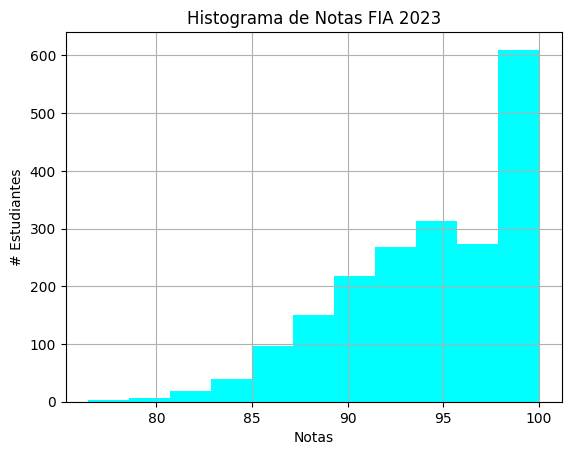

In [237]:
plt.hist(DB2022['Nota'],bins=11,color = "cyan",alpha=1)
plt.title("Histograma de Notas FIA 2023")
plt.grid()
plt.xlabel("Notas")
plt.ylabel("# Estudiantes")
plt.show()

Así mismo, se presentan dos tipos de diagramas de cajas y bigotes para el análisis de los promedios:


*   Un diagrama realizado con la función boxplot de PyPlot para la facultad enter
*   Dos diagramas de demostración de una función de creación de diagramas de cajas y bigotes de acuerdo a la carrera a analizar, tomando la base de datos incluso como una entrada



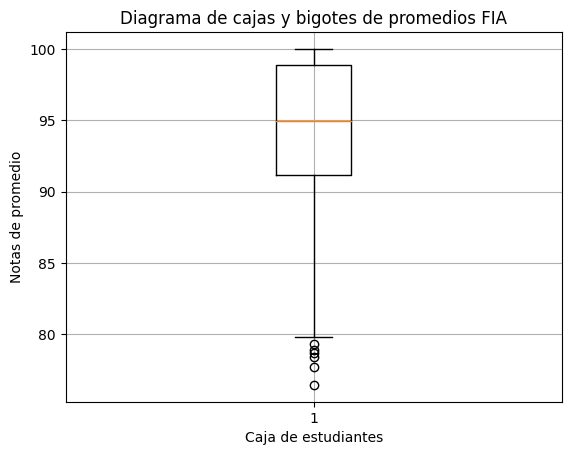

In [238]:
plt.boxplot(DB2022['Nota'])
plt.title("Diagrama de cajas y bigotes de promedios FIA")
plt.grid()
plt.xlabel("Caja de estudiantes")
plt.ylabel("Notas de promedio")
plt.show()

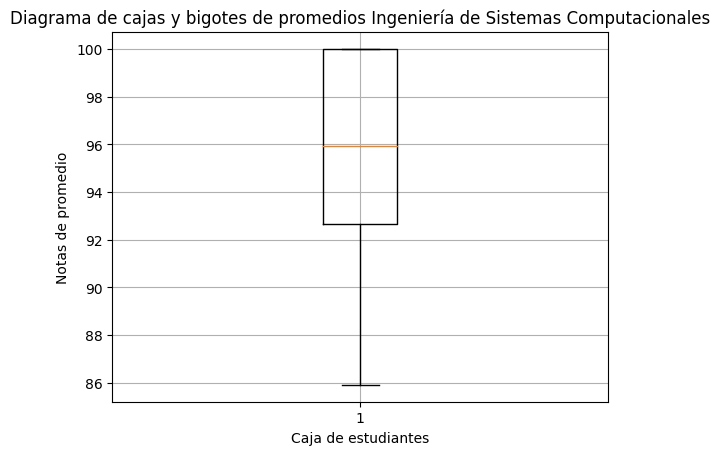

In [239]:
boxplotCreate(DB2022,'Ingeniería de Sistemas Computacionales')

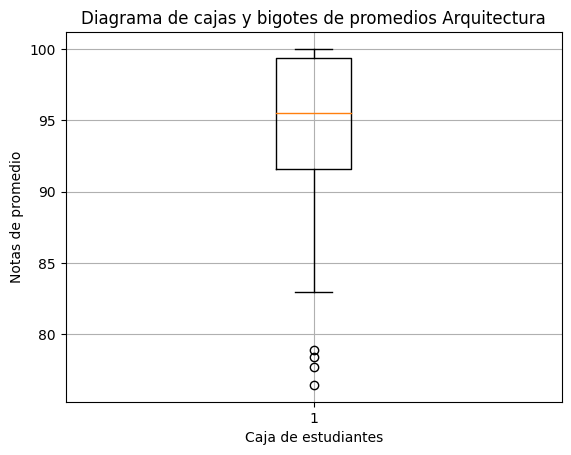

In [240]:
boxplotCreate(DB2022,'Arquitectura')

Se tiene a continuación un gráfico de torta y una tabla con las carreras en las que se hayan cursado más materias durante el semestre por parte de las matrículas de los estudiantes. Gracias a una función, se obtiene no sólo una gráfica clara en términos de porcentaje, sino tambien los datos exactos con los que se da a entender las carreras cuyos estudiantes hayan cursado más materias antes de terminar su currícula.

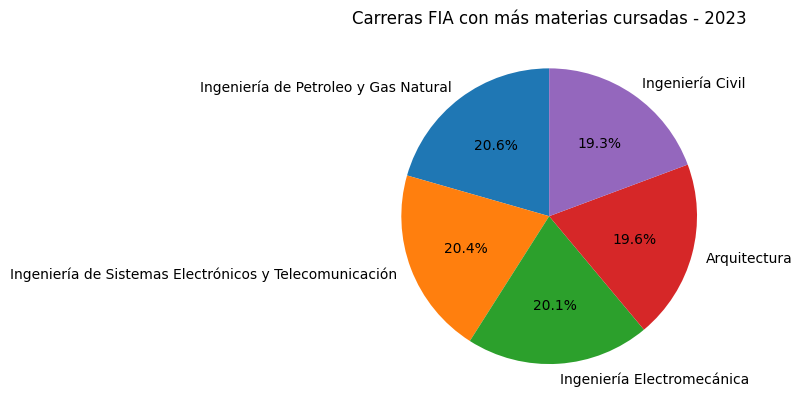

,Carrera,Materias tomadas en semestre
6,Ingeniería de Petroleo y Gas Natural,1184
8,Ingeniería de Sistemas Electrónicos y Telecomu...,1177
4,Ingeniería Electromecánica,1157
2,Arquitectura,1129
1,Ingeniería Civil,1113


In [241]:
mostCursos=pieCreator(DB2022,'Carrera','Materias tomadas en semestre',False,'Carreras FIA con más materias cursadas - 2023')
mostCursos

#### Pruebas con unión analítica de tablas

Para realizar una prueba de la unión analítica o join entre tablas, se ha creado un nuevo Dataframe de manera manual: La nominación de las carreras de la Facultad, junto a la Escuela o grupo al que cada una pertenece, y el jefe de carrera encargado de cada una.

In [242]:
DBCarreras=pd.DataFrame(
{
    'Carrera':["Ingeniería del Medio Ambiente y Energías Alternativas", "Arquitectura",
             "Ingeniería de la Producción","Ingeniería de Sistemas Computacionales","Ingeniería de Petroleo y Gas Natural",
             "Ingeniería Electromecánica","Ingeniería Civil","Ingeniería de Sistemas Electrónicos y Telecomunicación",
             "Ingeniería Industrial y de Sistemas", "Departamento de Ciencias Exactas"],
    'Grupo':["Desconocido","MEE","EIE","DTI","EIE","DTI","MEE","DTI","EIE","Ciencias Exactas"],
    'Jefe de carrera':["Desconocido","Sofía Del Castillo Celis","Oscar Valdivieso Taborga","Alexis Marechal",
                       "Sandra Liliana Ibáñez-Calero","Raúl Quezada Hinojosa","Álvaro Moscoso Wayar","Carlos Anibarro",
                      "Oscar Valdivieso Taborga","Tommy Pozo Vila"]
})
DBCarreras

,Carrera,Grupo,Jefe de carrera
0,Ingeniería del Medio Ambiente y Energías Alter...,Desconocido,Desconocido
1,Arquitectura,MEE,Sofía Del Castillo Celis
2,Ingeniería de la Producción,EIE,Oscar Valdivieso Taborga
3,Ingeniería de Sistemas Computacionales,DTI,Alexis Marechal
4,Ingeniería de Petroleo y Gas Natural,EIE,Sandra Liliana Ibáñez-Calero
5,Ingeniería Electromecánica,DTI,Raúl Quezada Hinojosa
6,Ingeniería Civil,MEE,Álvaro Moscoso Wayar
7,Ingeniería de Sistemas Electrónicos y Telecomu...,DTI,Carlos Anibarro
8,Ingeniería Industrial y de Sistemas,EIE,Oscar Valdivieso Taborga
9,Departamento de Ciencias Exactas,Ciencias Exactas,Tommy Pozo Vila


In [243]:
# Realizando un merge de tablas mediante unión de valores comunes "inner" para asignar el jefe de carrera y grupo al que pertenece el estudiante según su carrera
DB2022m=pd.merge(DB2022,DBCarreras,how='inner')
DB2022m

,Codigo,Genero,Edad,Carrera,Nota,Modalidad de Graduacion,Semestre,Materias tomadas en semestre,Grupo,Jefe de carrera
0,50000,Otro,19,Departamento de Ciencias Exactas,100.00,Por Excelencia,I,5,Ciencias Exactas,Tommy Pozo Vila
1,50005,Otro,19,Departamento de Ciencias Exactas,100.00,Por Excelencia,I,6,Ciencias Exactas,Tommy Pozo Vila
2,50006,Masculino,23,Departamento de Ciencias Exactas,93.69,Por Excelencia,I,6,Ciencias Exactas,Tommy Pozo Vila
3,50023,Otro,19,Departamento de Ciencias Exactas,98.82,Por Excelencia,I,6,Ciencias Exactas,Tommy Pozo Vila
4,50027,Femenino,21,Departamento de Ciencias Exactas,99.15,Por Excelencia,I,4,Ciencias Exactas,Tommy Pozo Vila
...,...,...,...,...,...,...,...,...,...,...
1995,51919,Femenino,22,Ingeniería del Medio Ambiente y Energías Alter...,95.14,Por Excelencia,II,6,Desconocido,Desconocido
1996,51923,Otro,20,Ingeniería del Medio Ambiente y Energías Alter...,94.26,Por Excelencia,II,6,Desconocido,Desconocido
1997,51946,Masculino,19,Ingeniería del Medio Ambiente y Energías Alter...,100.00,Por Excelencia,II,7,Desconocido,Desconocido
1998,51970,Otro,18,Ingeniería del Medio Ambiente y Energías Alter...,89.70,Por Trabajo final,II,6,Desconocido,Desconocido


In [244]:
# Reorganizando la pseudo-base de datos de graduados de la FIA para la Universidad mediante numeración de su código y removiendo indices extra
DB2022mSort=DB2022m.sort_values(by=['Codigo'])
DB2022mSort=DB2022mSort.reset_index(drop=True)
DB2022mSort

,Codigo,Genero,Edad,Carrera,Nota,Modalidad de Graduacion,Semestre,Materias tomadas en semestre,Grupo,Jefe de carrera
0,50000,Otro,19,Departamento de Ciencias Exactas,100.00,Por Excelencia,I,5,Ciencias Exactas,Tommy Pozo Vila
1,50001,Masculino,19,Ingeniería Civil,96.52,Por Excelencia,I,5,MEE,Álvaro Moscoso Wayar
2,50002,Femenino,19,Ingeniería Civil,96.90,Por Excelencia,I,4,MEE,Álvaro Moscoso Wayar
3,50003,Otro,18,Arquitectura,93.00,Por Excelencia,I,7,MEE,Sofía Del Castillo Celis
4,50004,Masculino,20,Arquitectura,94.21,Por Excelencia,I,7,MEE,Sofía Del Castillo Celis
...,...,...,...,...,...,...,...,...,...,...
1995,51995,Femenino,21,Ingeniería del Medio Ambiente y Energías Alter...,95.99,Por Excelencia,II,4,Desconocido,Desconocido
1996,51996,Masculino,19,Ingeniería de Petroleo y Gas Natural,99.14,Por Excelencia,II,6,EIE,Sandra Liliana Ibáñez-Calero
1997,51997,Masculino,23,Ingeniería Electromecánica,96.14,Por Excelencia,II,5,DTI,Raúl Quezada Hinojosa
1998,51998,Femenino,19,Arquitectura,91.87,Por Excelencia,II,4,MEE,Sofía Del Castillo Celis


Se realizó un análisis estadístico a partir de la tabla conjunta, uno que describirera el promedio de edad y rango de notas de los grupos segun el grupo o Escuela en la que se agrupan las carreras de la facultad y el semestre de graduación evaluado



In [245]:
DB2022Gr=DB2022mSort.groupby(['Grupo','Carrera','Semestre'])
DB2022Gr.aggregate(
{
    'Edad':np.mean,
    'Nota':[np.min,np.mean,np.max],
})

Edad  \
                                                                                   mean   
Grupo            Carrera                                            Semestre              
Ciencias Exactas Departamento de Ciencias Exactas                   I         20.354839   
                                                                    II        20.489583   
DTI              Ingeniería Electromecánica                         I         20.670213   
                                                                    II        20.745614   
                 Ingeniería de Sistemas Computacionales             I         20.438202   
                                                                    II        20.560000   
                 Ingeniería de Sistemas Electrónicos y Telecomun... I         20.551402   
                                                                    II        20.336364   
Desconocido      Ingeniería del Medio Ambiente y Energías Altern... I         20.762887   
                                                                    II        20.714286   
EIE              Ingeniería Industrial y de Sistemas                I         20.642202   
                                                                    II        20.505747   
                 Ingeniería de Petroleo y Gas Natural               I         20.464286   
                                                                    II        20.308411   
                 Ingeniería de la Producción                        I         20.354839   
                                                                    II        20.206186   
MEE              Arquitectura                                       I         20.545455   
                                                                    II        20.561224   
                 Ingeniería Civil                                   I         20.489583   
                                                                    II        20.336449   

                                                                               Nota  \
                                                                               amin   
Grupo            Carrera                                            Semestre          
Ciencias Exactas Departamento de Ciencias Exactas                   I         81.46   
                                                                    II        80.22   
DTI              Ingeniería Electromecánica                         I         82.23   
                                                                    II        80.55   
                 Ingeniería de Sistemas Computacionales             I         86.40   
                                                                    II        85.91   
                 Ingeniería de Sistemas Electrónicos y Telecomun... I         81.45   
                                                                    II        83.80   
Desconocido      Ingeniería del Medio Ambiente y Energías Altern... I         79.81   
                                                                    II        81.75   
EIE              Ingeniería Industrial y de Sistemas                I         82.25   
                                                                    II        82.33   
                 Ingeniería de Petroleo y Gas Natural               I         83.81   
                                                                    II        80.83   
                 Ingeniería de la Producción                        I         78.70   
                                                                    II        82.74   
MEE              Arquitectura                                       I         84.31   
                                                                    II        76.44   
                 Ingeniería Civil                                   I         82.11   
                                                                    II     

Finalmente, se crea una función que permita obtener el código, el género, la edad, la carrera y grupo de los estudiantes que esten graduándose por la modalidad de excelencia, ordenados de acuerdo a la nota final que han obtenido desde la más alta a la mas baja y el código en caso de similitudes. Esta obtención de datos dependerá de la modalidad de búsqueda: por grupo o escuela, o por una carrera particular

In [246]:
def getExcelenciaPorClasificacion(df,clasificacion,search):
  """
    df - DataFrame
    clasificacion - columna de clasificación de los de Excelencia (0=Grupo,1=Carrera)
    search - valor a buscar por la clasificacion
  """
  grouping=""
  if clasificacion==0:
    grouping="Grupo"
  elif clasificacion==1:
    grouping="Carrera"
  Excelencia=df[(df['Modalidad de Graduacion']=='Por Excelencia') & (df[grouping]==search)]
  Excelencia=Excelencia[['Codigo',"Genero","Edad","Carrera","Grupo","Nota"]]
  Excelencia=Excelencia.sort_values(by=['Nota'],ascending=False)
  return Excelencia

In [247]:
ExcelenciaGrupo=getExcelenciaPorClasificacion(DB2022mSort,0,'MEE')
ExcelenciaGrupo.head()

,Codigo,Genero,Edad,Carrera,Grupo,Nota
1010,51010,Femenino,18,Ingeniería Civil,MEE,100.0
1474,51474,Masculino,23,Ingeniería Civil,MEE,100.0
1332,51332,Femenino,19,Ingeniería Civil,MEE,100.0
1350,51350,Masculino,22,Arquitectura,MEE,100.0
629,50629,Femenino,21,Arquitectura,MEE,100.0


In [248]:
ExcelenciaSistemas=getExcelenciaPorClasificacion(DB2022mSort,1,'Ingeniería de Sistemas Computacionales')
ExcelenciaSistemas.head()

,Codigo,Genero,Edad,Carrera,Grupo,Nota
11,50011,Femenino,18,Ingeniería de Sistemas Computacionales,DTI,100.0
623,50623,Otro,18,Ingeniería de Sistemas Computacionales,DTI,100.0
1342,51342,Otro,21,Ingeniería de Sistemas Computacionales,DTI,100.0
1260,51260,Otro,21,Ingeniería de Sistemas Computacionales,DTI,100.0
1254,51254,Otro,19,Ingeniería de Sistemas Computacionales,DTI,100.0


## Conclusiones

A partir de este proyecto, se ha realizado una demostración del avance teórico-práctico de los conceptos avanzados del primer parcial de la materia de Data Science, tomando como ejemplo una simulación de datos reales que se pudieran utilizar para análisis de rendimiento, así como de la población que aporta esta información.
Si bien se han realizado pruebas para la muestra y análisis de la información del dataSet, no se han hecho conclusiones estáticas debido a la naturaleza aleatoria de esta simulación. Sin embargo, para un entorno realista, se puede utilizar las bases de este modelo para aspectos a analizar en la Universidad:

*   La población de estudiantes que estudian en la FIA de acuerdo a su edad y género, permitiendo tener perspectivas de cuán jóven e inclusiva es la educación dentro de la Universidad
*   La relación entre el número de materias cursadas por semestre con la nota, indicando cuánto ayuda la cantidad de cursos avanzados a la ponderación del promedio de graduación, o incluso qué carreras cuentan con la mayor cantidad de materias troncales/obligatorias en su currícula
*   El nivel de estudiantes graduados por Excelencia (promedios mayores a 90.0) mediante sus promedios, analizando tambien la calidad de las Escuelas y sus carreras con ello para promover mejoras e incluso más apoyo dependiendo de su rendimiento gracias a los resultados.

Se pueden realizar diversas modificaciones a esta base, como la adición del número de faltas a clase, la modalidad de estudio predominante (virtual, híbrido o presencial), el estado de cuenta de su pago; con el fin de obtener más información relevante y un análisis más profundo del bienestar y rendimiento estudiantil de la Universidad


